In [195]:
# Load required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go

### Step 1 Read the train bike.csv and test bike.csv datasets into you environment. How many features the data has? what are the types of those features? how many observations are there in the train and test datasets?

In [196]:
# Load data
df_test = pd.read_csv('bike_test.csv')
df_test.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-26,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-26,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-26,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-26,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-26,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes


In [197]:
df_train = pd.read_csv('bike_train.csv')
df_train.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   7200 non-null   object 
 1   Rented_Bike_Count      7200 non-null   int64  
 2   Hour                   7200 non-null   int64  
 3   Temperature            7200 non-null   float64
 4   Humidity               7200 non-null   int64  
 5   Wind_speed             7200 non-null   float64
 6   Visibility             7200 non-null   int64  
 7   Dew_point_temperature  7200 non-null   float64
 8   Solar_Radiation        7200 non-null   float64
 9   Rainfall               7200 non-null   float64
 10  Snowfall               7200 non-null   float64
 11  Seasons                7200 non-null   object 
 12  Holiday                7200 non-null   object 
 13  Functioning_Day        7200 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 787.6+ 

In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1560 non-null   object 
 1   Rented_Bike_Count      1560 non-null   int64  
 2   Hour                   1560 non-null   int64  
 3   Temperature            1560 non-null   float64
 4   Humidity               1560 non-null   int64  
 5   Wind_speed             1560 non-null   float64
 6   Visibility             1560 non-null   int64  
 7   Dew_point_temperature  1560 non-null   float64
 8   Solar_Radiation        1560 non-null   float64
 9   Rainfall               1560 non-null   float64
 10  Snowfall               1560 non-null   float64
 11  Seasons                1560 non-null   object 
 12  Holiday                1560 non-null   object 
 13  Functioning_Day        1560 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 170.8+ 

In [200]:
df_train.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,705.353889,11.500000,12.800444,58.045556,1.735681,1462.420139,3.941958,0.576522,0.133375,0.075208
std,651.472668,6.922667,11.940619,20.243651,1.046029,597.576433,12.942692,0.876720,1.013633,0.441774
min,0.000000,0.000000,-16.400000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,190.000000,5.750000,3.300000,43.000000,0.900000,984.000000,-4.900000,0.000000,0.000000,0.000000
50%,489.000000,11.500000,13.500000,57.000000,1.500000,1731.000000,4.850000,0.010000,0.000000,0.000000
75%,1069.250000,17.250000,22.325000,74.000000,2.400000,2000.000000,14.600000,0.940000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [201]:
df_test.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,701.132051,11.500000,13.263590,59.060256,1.675192,1318.698077,4.682372,0.534904,0.219359,0.074423
std,614.417405,6.924406,11.960682,20.888174,0.988961,642.636665,13.577990,0.830370,1.549383,0.412885
min,0.000000,0.000000,-17.800000,0.000000,0.000000,38.000000,-29.000000,0.000000,0.000000,0.000000
25%,195.000000,5.750000,4.300000,42.000000,0.900000,731.750000,-3.625000,0.000000,0.000000,0.000000
50%,571.000000,11.500000,14.700000,59.000000,1.500000,1387.500000,6.000000,0.010000,0.000000,0.000000
75%,1039.000000,17.250000,22.900000,75.250000,2.300000,1991.250000,16.925000,0.860000,0.000000,0.000000
max,3251.000000,23.000000,38.000000,98.000000,5.700000,2000.000000,26.800000,3.350000,29.500000,3.500000


### Step 2 Select two features (except Date) and plot them against the Rented Bike Count (i.e. you should produce two different plots; don’t forget to name the axes!). Discuss (based solely on the visual information) how useful this single feature is for the prediction of Rented Bike Count?

<Axes: title={'center': 'Humidity vs Rented_Bike_Count'}, xlabel='Humidity', ylabel='Temperature'>

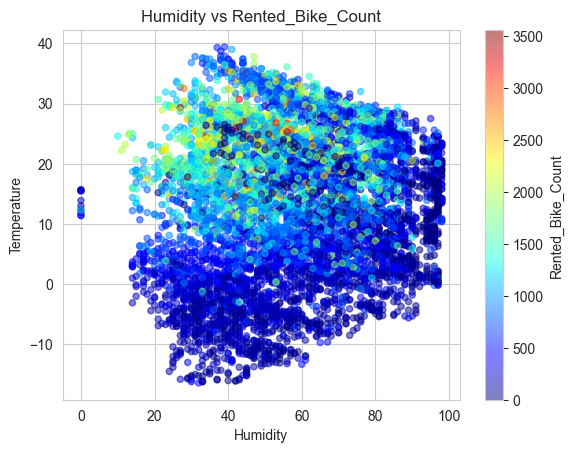

In [202]:
df_train.plot(kind='scatter', x = 'Humidity', y='Temperature', title='Humidity vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Wind_speed vs Rented_Bike_Count'}, xlabel='Wind_speed', ylabel='Temperature'>

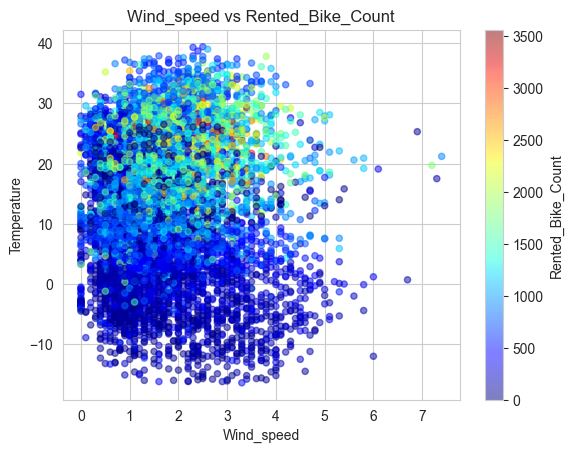

In [203]:
df_train.plot(kind='scatter', x = 'Wind_speed', y='Temperature', title='Wind_speed vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Visibility vs Rented_Bike_Count'}, xlabel='Visibility', ylabel='Temperature'>

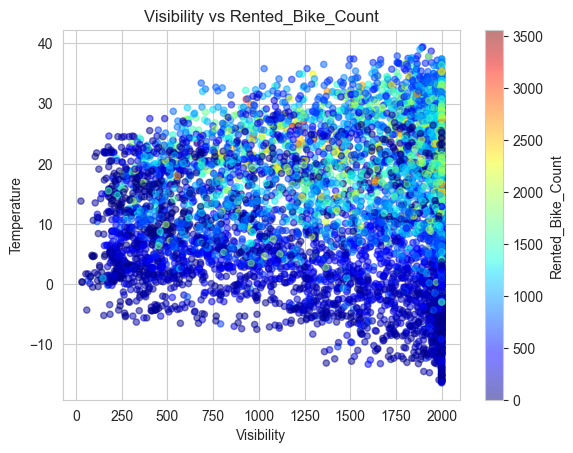

In [204]:
df_train.plot(kind='scatter', x = 'Visibility', y='Temperature', title='Visibility vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Dew_point_temperature vs Rented_Bike_Count'}, xlabel='Dew_point_temperature', ylabel='Temperature'>

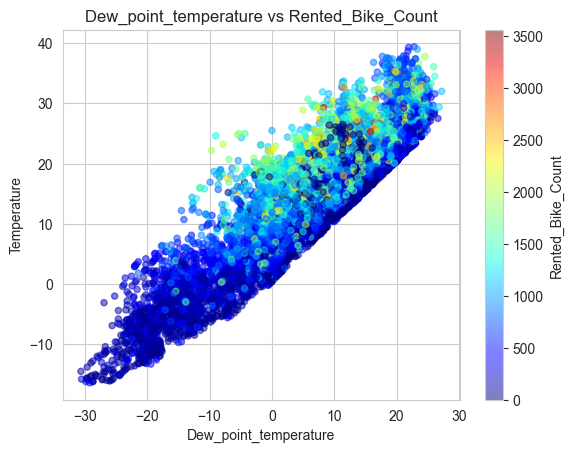

In [205]:
df_train.plot(kind='scatter', x = 'Dew_point_temperature', y='Temperature', title='Dew_point_temperature vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

### Step 3 One-Hot Encoding categorical columns using pandas 

In [206]:
atribute = df_train.drop('Date', axis=1)
atribute.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [207]:
atribute1 = df_test.drop('Date', axis=1)
atribute1.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,Winter,No Holiday,Yes
2,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,Winter,No Holiday,Yes
3,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,Winter,No Holiday,Yes
4,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes


In [208]:
categorical_columns = [
    'Seasons',
    'Holiday',
    'Functioning_Day'
]

In [209]:
df_encoded = pd.get_dummies(atribute, columns=categorical_columns, dtype=float)
df_encoded.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [210]:
df_encoded_test = pd.get_dummies(atribute1, columns=categorical_columns, dtype=float)
df_encoded_test.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Step 3.1 Compute the matrix of correlations between variables

In [211]:
# Compute and visualize the matrix of correlations between variables
corr = df_encoded.corr()
corr


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
Rented_Bike_Count,1.000000,4.107538e-01,0.548657,-0.208198,0.113308,0.223146,0.389269,0.256194,-0.125171,-0.136588,1.190650e-01,-2.983580e-02,3.326375e-01,-4.218667e-01,-6.944987e-02,6.944987e-02,-0.204081,0.204081
Hour,0.410754,1.000000e+00,0.124927,-0.250166,0.279282,0.099954,0.000910,0.145842,-0.013557,-0.022658,2.166652e-15,-1.043138e-15,1.841074e-16,-1.294267e-15,-5.114097e-17,4.096673e-17,-0.006559,0.006559
Temperature,0.548657,1.249266e-01,1.000000,0.136067,-0.038550,0.066523,0.910930,0.354755,0.038850,-0.212081,1.004605e-01,-3.175859e-02,6.683514e-01,-7.370533e-01,-4.660840e-02,4.660840e-02,0.046980,-0.046980
Humidity,-0.208198,-2.501665e-01,0.136067,1.000000,-0.331097,-0.549767,0.521883,-0.471336,0.237261,0.118007,6.224145e-02,3.847307e-02,1.350677e-01,-2.357823e-01,-5.604661e-02,5.604661e-02,0.031769,-0.031769
Wind_speed,0.113308,2.792824e-01,-0.038550,-0.331097,1.000000,0.165783,-0.176291,0.334667,-0.012854,-0.004753,-1.470498e-01,8.518170e-02,-5.241538e-02,1.142835e-01,1.524391e-02,-1.524391e-02,-0.005700,0.005700
Visibility,0.223146,9.995449e-02,0.066523,-0.549767,0.165783,1.000000,-0.151312,0.159674,-0.168206,-0.141289,7.394040e-02,-1.673264e-01,9.710069e-02,-3.714714e-03,3.399173e-02,-3.399173e-02,-0.008460,0.008460
Dew_point_temperature,0.389269,9.096679e-04,0.910930,0.521883,-0.176291,-0.151312,1.000000,0.092740,0.116227,-0.143232,1.124347e-01,-2.572895e-02,6.384020e-01,-7.251078e-01,-6.044504e-02,6.044504e-02,0.054489,-0.054489
Solar_Radiation,0.256194,1.458417e-01,0.354755,-0.471336,0.334667,0.159674,0.092740,1.000000,-0.074933,-0.070479,-2.781771e-02,4.891789e-02,1.552567e-01,-1.763569e-01,-2.988362e-03,2.988362e-03,0.008965,-0.008965
Rainfall,-0.125171,-1.355717e-02,0.038850,0.237261,-0.012854,-0.168206,0.116227,-0.074933,1.000000,0.016425,3.647179e-03,5.149564e-02,7.128218e-03,-6.227104e-02,-1.298977e-02,1.298977e-02,0.005463,-0.005463
Snowfall,-0.136588,-2.265816e-02,-0.212081,0.118007,-0.004753,-0.141289,-0.143232,-0.070479,0.016425,1.000000,-1.109120e-02,-9.829599e-02,-9.829599e-02,2.076832e-01,-3.125691e-02,3.125691e-02,-0.032089,0.032089


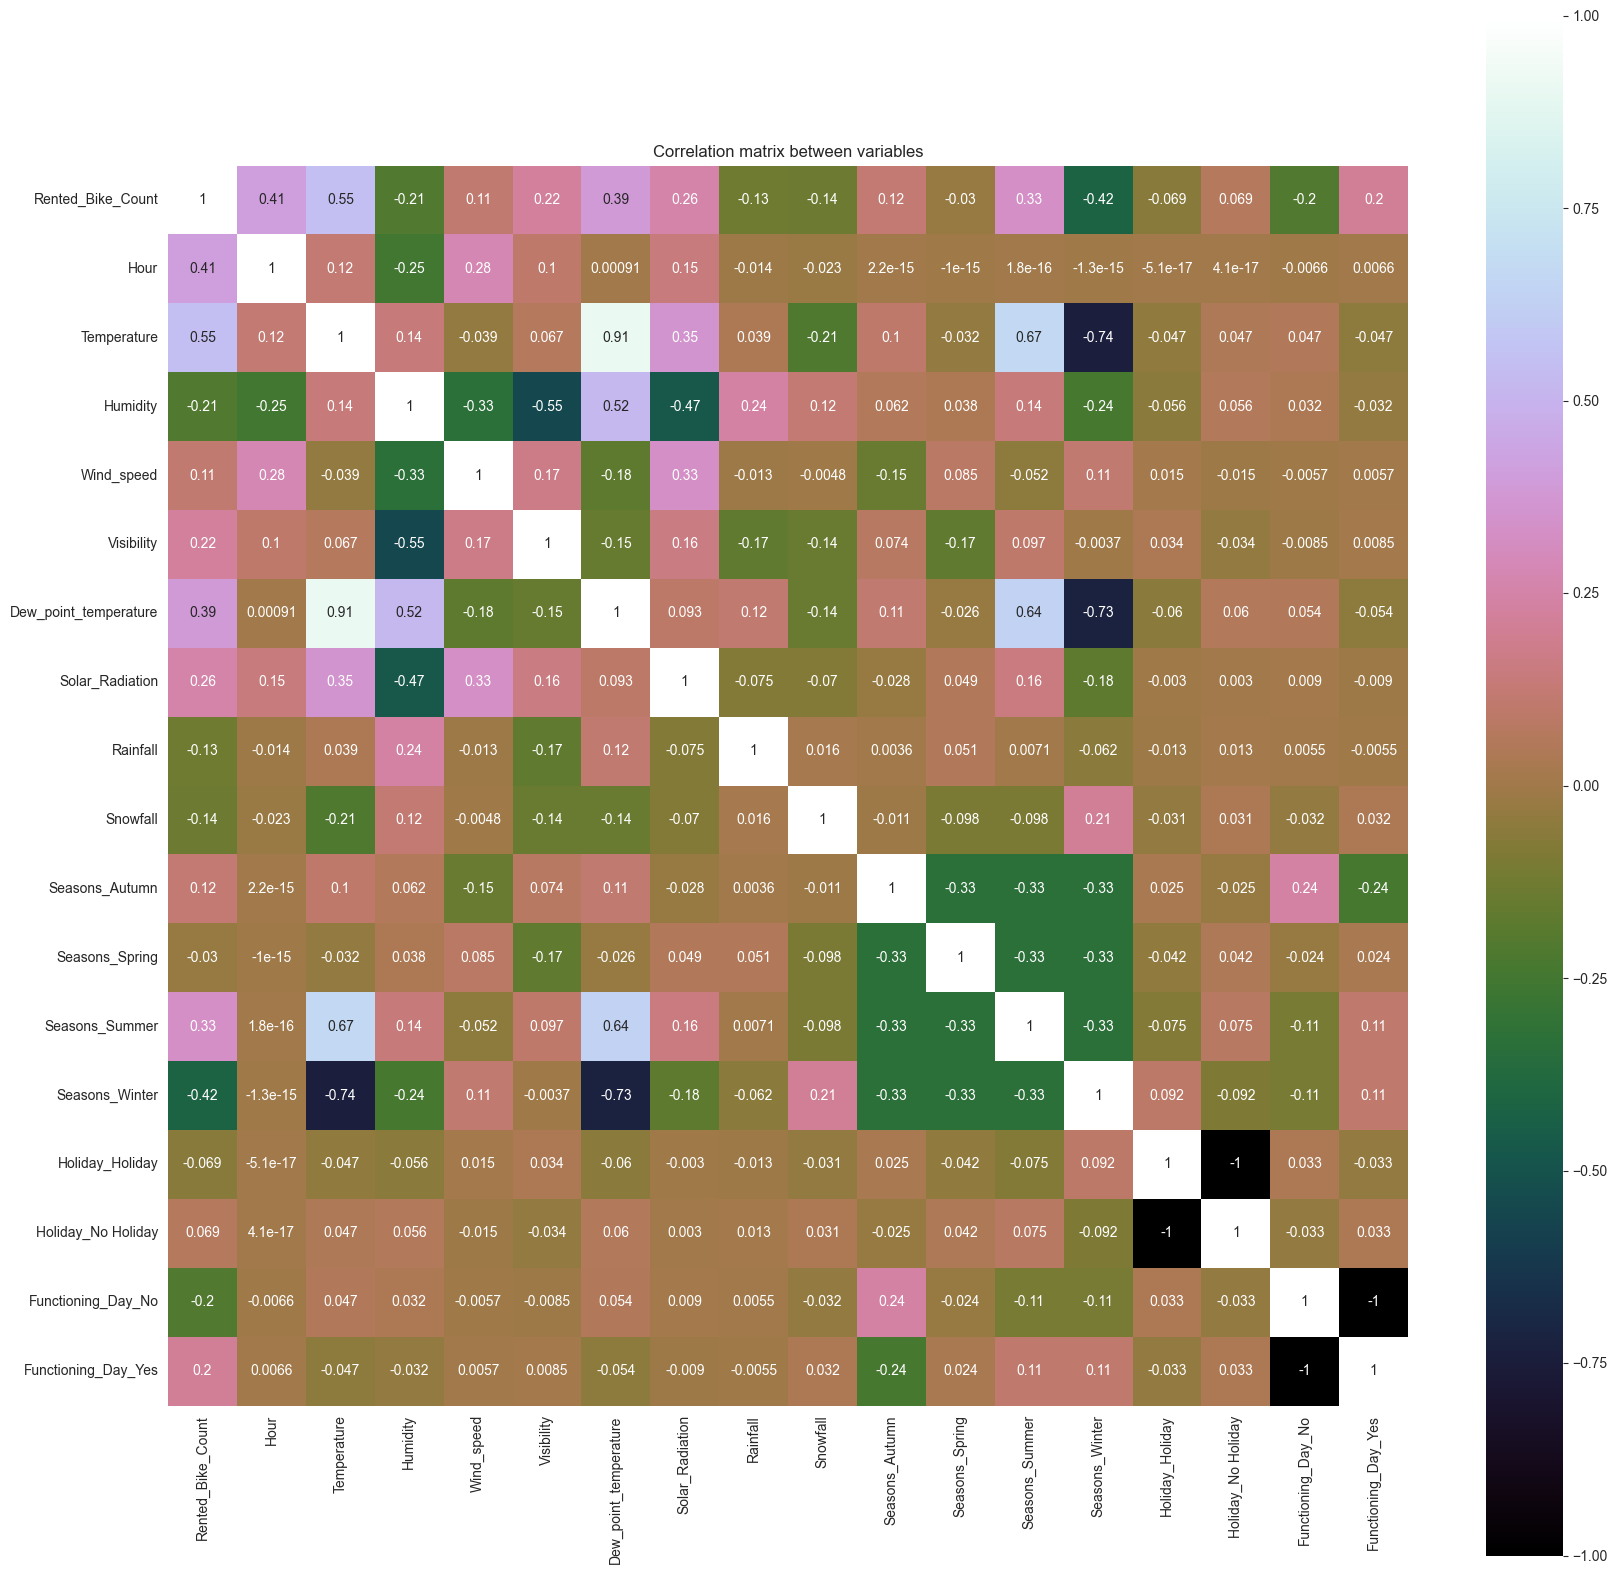

In [212]:
# Visualize the correlation matrix for better interpretation
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation matrix between variables')
plt.show()

In [213]:
fig = go.Figure(go.Heatmap(z = corr.values.tolist(),
                           x = corr.columns,
                           y = corr.columns,
                           colorscale='rdylgn',
                           zmin=-1,
                           zmax=1),
                layout = go.Layout(width=800, height=800,
                                   xaxis_showgrid=False,
                                   yaxis_showgrid=False,
                                   yaxis_autorange='reversed'))
fig.update_layout(title='Correlation matrix between variables',
                  legend_title='Pearson Coefficient',
                  font = dict(family = 'sans-serif, sans-serif',
                              size = 18,
                              color = "black"),
                  margin = dict(l=0, r=0,b=0))
fig.show(config={'displayModeBar': False})

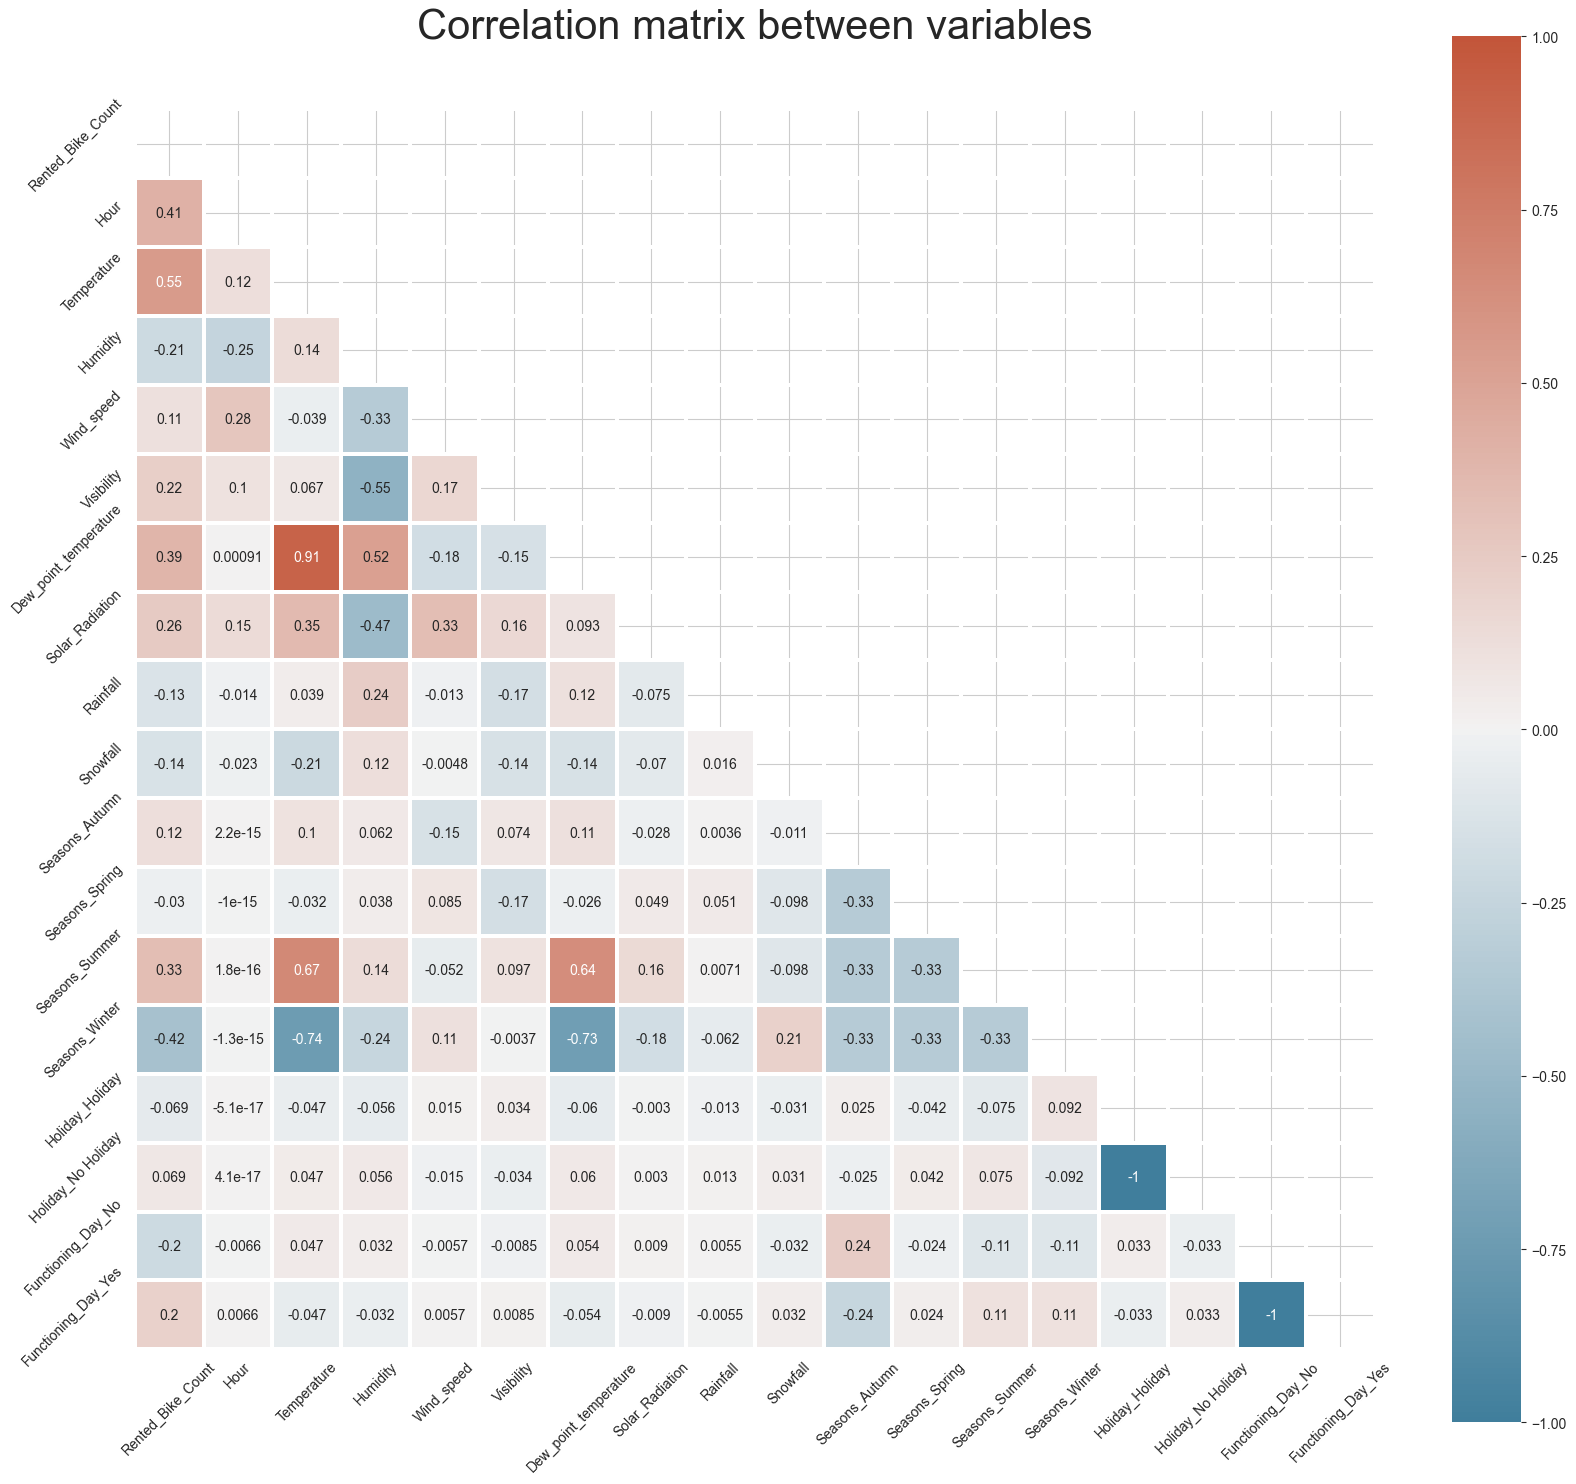

In [214]:
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": .9}, annot=True)

plt.title('Correlation matrix between variables', size = 30, y = 1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



<Axes: title={'center': 'Temperature vs Humidity'}, xlabel='Temperature', ylabel='Seasons_Winter'>

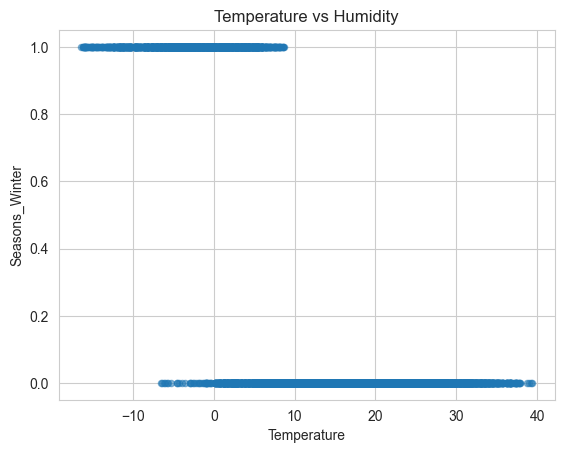

In [215]:
# Identify a pair of features with the lowest correlation (either positive and negative) and plot them
df_encoded.plot(kind='scatter', x = 'Temperature', y='Seasons_Winter', title='Temperature vs Humidity', alpha=0.5)

<Axes: title={'center': 'Temperature vs Dew_point_temperature'}, xlabel='Temperature', ylabel='Dew_point_temperature'>

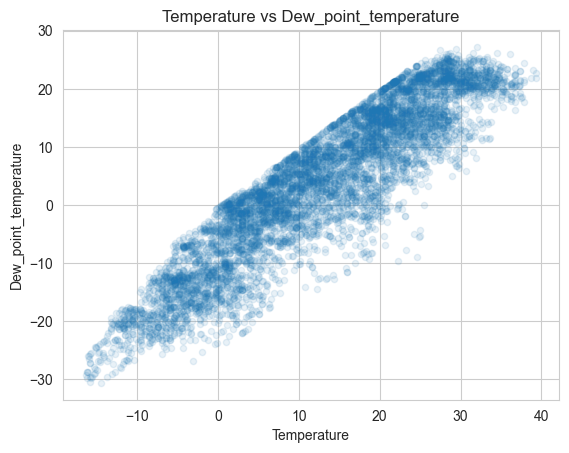

In [216]:
df_encoded.plot(kind='scatter', x = 'Temperature', y='Dew_point_temperature', title='Temperature vs Dew_point_temperature', alpha=0.1)

### Step 4 train a linear regression model with Rented Bike Count as a response and all other variables (except the Date feature) as the predictors. Predict the count of rented bikes for the testing dataset and plot the predictions. What problems do you see in your model based on this plot?


In [217]:
# Train a linear regression model and predict the "Rented Bike Count" for the testing dataset.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [218]:
# train a linear regression model using all variables
X_train = df_encoded.drop('Rented_Bike_Count', axis=1)
y_train = df_encoded['Rented_Bike_Count']

In [219]:
X_test = df_encoded_test.drop('Rented_Bike_Count', axis=1)
y_test = df_encoded_test['Rented_Bike_Count']


In [220]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [221]:
# # Import plotting package
import plotly.express as px



In [222]:
# Put data to plot in dataframe
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

## Make scatter plot from data
fig = px.scatter(df_plot, x='Actual', y='Predicted', title='Actual vs Predicted')
# Add straight line indicating perfect model
fig.add_shape(type='line',x0=0, x1=3000, y0=0, y1=1000, line = dict(color='red', width=4, dash='dot',), )
fig.show()

In [223]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(y_test) - np.array(y_pred)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(y_test, y_pred)
print(f"R2: {round(r2,4)}")


RMS: 428.8014 
R2: 0.5126


### Step 5 train you linear regression model on the train dataset and predict counts of rented bikes for the test data set. Plot predicted and (transformed) true rented bike counts. Calculate the R2 measure of fit. Discuss the plot and calculated measure of fit.

In [232]:
#Apply the given logarithmic transformation to the "Rented Bike Count" in both datasets
df_encoded['Rented_Bike_Count'] = np.log(df_encoded['Rented_Bike_Count'] + 1)
df_encoded_test['Rented_Bike_Count'] = np.log(df_encoded_test['Rented_Bike_Count'] + 1)


In [233]:
# Retrain the linear regression model on the transformed train dataset
X_train = df_encoded.drop('Rented_Bike_Count', axis=1)
y_train = df_encoded['Rented_Bike_Count']

In [234]:
X_test = df_encoded_test.drop('Rented_Bike_Count', axis=1)
y_test = df_encoded_test['Rented_Bike_Count']

In [236]:
# train you linear regression model on the train dataset and predict counts of rented bikes for the test data set
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [239]:
# Plot predicted and (transformed) true rented bike counts.
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# # Make scatter plot from data
fig = px.scatter(df_plot, x='Actual', y='Predicted', title='Actual vs Predicted')
# # Add straight line indicating perfect model
fig.add_shape(type='line',x0=0, x1=1.5, y0=0, y1=1.5, line = dict(color='red', width=4, dash='dot',), )
fig.show()



In [240]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(y_test) - np.array(y_pred)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(y_test, y_pred)
print(f"R2: {round(r2,4)}")


RMS: 0.0425 
R2: 0.953
